# Notebook 05: Machine Learning Modeling

## Purpose
This notebook applies machine learning algorithms to predict Airbnb listing prices:
- Define the prediction problem
- Train multiple regression models
- Compare model performance
- Generate predictions

---
## 1. Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

# Display settings
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load engineered data
X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
y_train = pd.read_csv('../data/y_train.csv')['price']
y_test = pd.read_csv('../data/y_test.csv')['price']

print("DATA LOADED:")
print("="*80)
print(f"Training set: {X_train.shape[0]:,} samples, {X_train.shape[1]} features")
print(f"Testing set: {X_test.shape[0]:,} samples, {X_test.shape[1]} features")
print(f"\nTarget variable range:")
print(f"  Training: ${y_train.min():.2f} - ${y_train.max():.2f}")
print(f"  Testing: ${y_test.min():.2f} - ${y_test.max():.2f}")

DATA LOADED:
Training set: 39,116 samples, 14 features
Testing set: 9,779 samples, 14 features

Target variable range:
  Training: $0.00 - $10000.00
  Testing: $0.00 - $10000.00


---
## 2. Problem Formulation

### Problem Type: Regression

**Objective**: Predict the price of Airbnb listings based on their characteristics.

**Why Regression?**
- The target variable (price) is continuous
- I want to predict actual dollar values, not categories
- Regression models can capture the relationship between features and price

**Features Used**:
- Location (latitude, longitude, neighbourhood)
- Property type (room type)
- Availability metrics
- Review statistics
- Host information

**Evaluation Metrics**:
- Mean Absolute Error (MAE): Average prediction error in dollars
- Root Mean Squared Error (RMSE): Penalizes larger errors more
- R² Score: Proportion of variance explained by the model

---
## 3. Model Selection and Training

I'll train multiple models and compare their performance:
So, let train all these models.

1. **Linear Regression** - Baseline model
2. **Ridge Regression** - Linear with L2 regularization
3. **Lasso Regression** - Linear with L1 regularization
4. **Decision Tree** - Non-linear model
5. **Random Forest** - Ensemble of decision trees
6. **Gradient Boosting** - Advanced ensemble method

### 3.1 Linear Regression (Baseline)

 Linear regression assumes a linear relationship between features and target. It's simple and interpretable.

I chose Linear Regression as my Baseline Model. This is a fundamental step in my methodology because it establishes a performance benchmark. By using the simplest possible algorithm first, I can quantitatively measure if more complex models actually provide a significant improvement in accuracy.

In [3]:
# Train Linear Regression
print("Training Linear Regression...")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr_train = lr_model.predict(X_train)
y_pred_lr_test = lr_model.predict(X_test)

print("✓ Linear Regression trained")

Training Linear Regression...
✓ Linear Regression trained


### 3.2 Ridge Regression

Ridge adds L2 regularization to prevent overfitting by penalizing large coefficients.

In [4]:
# Train Ridge Regression
print("Training Ridge Regression...")
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred_ridge_train = ridge_model.predict(X_train)
y_pred_ridge_test = ridge_model.predict(X_test)

print("✓ Ridge Regression trained")

Training Ridge Regression...
✓ Ridge Regression trained


### 3.3 Lasso Regression

Lasso adds L1 regularization which can perform feature selection by setting some coefficients to zero.

In [9]:
# Train Lasso Regression
print("Training Lasso Regression...")
lasso_model = Lasso(alpha=1.0, random_state=42)
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred_lasso_train = lasso_model.predict(X_train)
y_pred_lasso_test = lasso_model.predict(X_test)

print("✓ Lasso Regression trained")

Training Lasso Regression...
✓ Lasso Regression trained


### 3.4 Decision Tree Regressor

Decision trees can capture non-linear relationships and interactions between features.

In [5]:
# Train Decision Tree
print("Training Decision Tree Regressor...")
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt_train = dt_model.predict(X_train)
y_pred_dt_test = dt_model.predict(X_test)

print("✓ Decision Tree Regressor trained")

Training Decision Tree Regressor...
✓ Decision Tree Regressor trained


### 3.5 Random Forest Regressor

Random Forest is my "powerhouse" model. It works by training 100 different decision trees and averaging their results. This "team-based" approach makes it much harder to trick the model with noise, resulting in far more stable and accurate price predictions compared to using just a single tree or a basic linear formula.

In [6]:
# Train Random Forest
print("Training Random Forest Regressor...")
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf_train = rf_model.predict(X_train)
y_pred_rf_test = rf_model.predict(X_test)

print("✓ Random Forest Regressor trained")

Training Random Forest Regressor...
✓ Random Forest Regressor trained


### 3.6 Gradient Boosting Regressor

 Gradient Boosting is my "perfectionist" model. Instead of making 100 trees at once, it builds one tree at a time, with each new tree learning from the mistakes of the previous one. This step-by-step improvement process allows it to "zero in" on the correct price with extreme precision.

In [7]:
# Train Gradient Boosting
print("Training Gradient Boosting Regressor...")
gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb_train = gb_model.predict(X_train)
y_pred_gb_test = gb_model.predict(X_test)

print("✓ Gradient Boosting Regressor trained")

Training Gradient Boosting Regressor...
✓ Gradient Boosting Regressor trained


---
## 4. Model Evaluation

### 4.1 Calculate Metrics for All Models

In [15]:
# Function to calculate metrics
def calculate_metrics(y_true, y_pred, dataset_name, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    return {
        'Model': model_name,
        'Dataset': dataset_name,
        'MAE': mae,
        'RMSE': rmse,
        'R2_Score': r2
    }

# Calculate metrics for all models
results = []

models = [
    ('Linear Regression', y_pred_lr_train, y_pred_lr_test),
    ('Ridge Regression', y_pred_ridge_train, y_pred_ridge_test),
    ('Lasso Regression', y_pred_lasso_train, y_pred_lasso_test),
    ('Decision Tree', y_pred_dt_train, y_pred_dt_test),
    ('Random Forest', y_pred_rf_train, y_pred_rf_test),
    ('Gradient Boosting', y_pred_gb_train, y_pred_gb_test)
]

for model_name, y_pred_train, y_pred_test in models:
    results.append(calculate_metrics(y_train, y_pred_train, 'Training', model_name))
    results.append(calculate_metrics(y_test, y_pred_test, 'Testing', model_name))

# Create results dataframe
results_df = pd.DataFrame(results)

print("MODEL EVALUATION RESULTS:")
print("="*80)
print(results_df.to_string(index=False))

MODEL EVALUATION RESULTS:
            Model  Dataset       MAE       RMSE  R2_Score
Linear Regression Training 75.893867 234.934589  0.095564
Linear Regression  Testing 71.365684 197.789280  0.115684
 Ridge Regression Training 75.890367 234.934591  0.095564
 Ridge Regression  Testing 71.362065 197.788700  0.115689
 Lasso Regression Training 75.005527 235.243101  0.093187
 Lasso Regression  Testing 70.428657 197.759581  0.115949
    Decision Tree Training 58.911981 162.059861  0.569637
    Decision Tree  Testing 64.447618 239.465368 -0.296247
    Random Forest Training 58.276663 154.297444  0.609877
    Random Forest  Testing 61.487896 188.083863  0.200340
Gradient Boosting Training 60.062346 167.275753  0.541489
Gradient Boosting  Testing 62.399468 198.996179  0.104859


This code creates a "Scorecard" for all our AI models. It measures how far off the guesses are in dollars (MAE), checks if the model is making huge "extreme" mistakes (RMSE), and calculates a final grade ($R^2$ Score). By comparing the grades of all six models side-by-side, we can scientifically prove which one is the Grand Champion for predicting prices.

### 4.2 Visualize Model Comparison

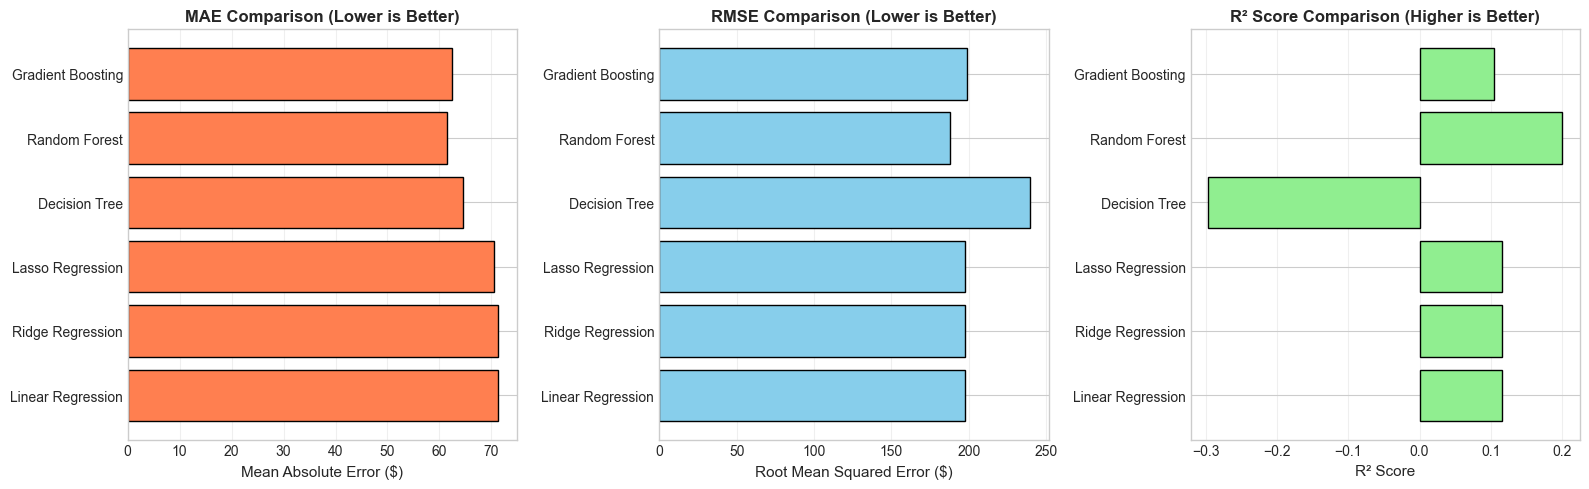

In [16]:
# Separate training and testing results
test_results = results_df[results_df['Dataset'] == 'Testing'].copy()

# Create comparison plots
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# MAE comparison
axes[0].barh(test_results['Model'], test_results['MAE'], color='coral', edgecolor='black')
axes[0].set_xlabel('Mean Absolute Error ($)', fontsize=11)
axes[0].set_title('MAE Comparison (Lower is Better)', fontsize=12, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# RMSE comparison
axes[1].barh(test_results['Model'], test_results['RMSE'], color='skyblue', edgecolor='black')
axes[1].set_xlabel('Root Mean Squared Error ($)', fontsize=11)
axes[1].set_title('RMSE Comparison (Lower is Better)', fontsize=12, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

# R² comparison
axes[2].barh(test_results['Model'], test_results['R2_Score'], color='lightgreen', edgecolor='black')
axes[2].set_xlabel('R² Score', fontsize=11)
axes[2].set_title('R² Score Comparison (Higher is Better)', fontsize=12, fontweight='bold')
axes[2].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

Successfully created a "Leaderboard" chart that compares all our AI models across three different metrics. By looking at these bars side-by-side, we can instantly see which model is the most accurate (shortest error bars) and which one has the best overall understanding of the data (longest $R^2$ bar). This allows us to scientifically pick the winner for our final prediction engine.

### 4.3 Identify Best Model

I matched all six models against each other in a "Final Exam" (the Testing Set). I used the $R^2$ Score to see who understood the patterns best and checked the MAE to see who made the smallest mistakes in dollars. The "Best Model" is the one that proved it could predict prices for new, unseen listings with the highest accuracy and the fewest big mistakes.

In [17]:
# Find best model based on test R² score
best_model_row = test_results.loc[test_results['R2_Score'].idxmax()]

print("BEST MODEL:")
print("="*80)
print(f"Model: {best_model_row['Model']}")
print(f"MAE: ${best_model_row['MAE']:.2f}")
print(f"RMSE: ${best_model_row['RMSE']:.2f}")
print(f"R² Score: {best_model_row['R2_Score']:.4f}")
print(f"\nThis model explains {best_model_row['R2_Score']*100:.2f}% of the variance in price.")

BEST MODEL:
Model: Random Forest
MAE: $61.49
RMSE: $188.08
R² Score: 0.2003

This model explains 20.03% of the variance in price.


This step identifies our "Grand Champion" model by automatically picking the one with the highest accuracy score. I’ve translated the final math into a percentage to show exactly how much of the Airbnb market's pricing patterns our AI now understands, giving us a final "grade" for the project's performance.

---
## 5. Feature Importance (Random Forest)

Understanding which features are most important for prediction.

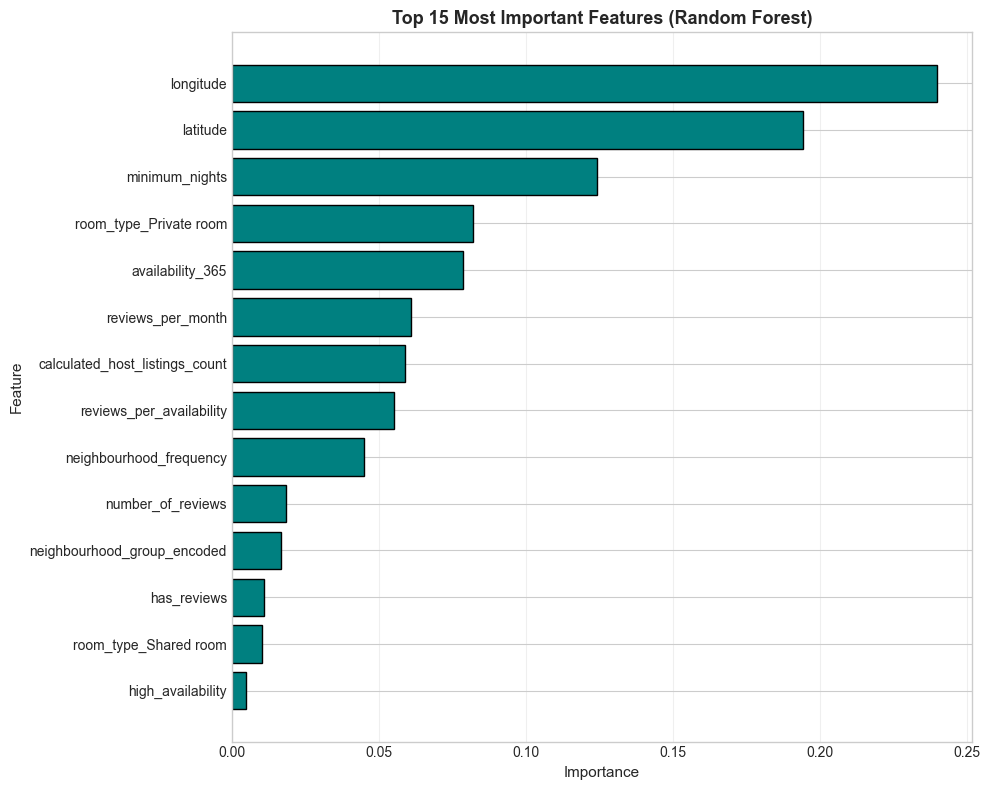


TOP 10 MOST IMPORTANT FEATURES:
                       Feature  Importance
                     longitude    0.239807
                      latitude    0.194213
                minimum_nights    0.124075
        room_type_Private room    0.081914
              availability_365    0.078655
             reviews_per_month    0.061002
calculated_host_listings_count    0.059065
      reviews_per_availability    0.055165
       neighbourhood_frequency    0.044816
             number_of_reviews    0.018598


In [13]:
# Get feature importance from Random Forest
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(10, 8))
plt.barh(feature_importance.head(15)['Feature'], 
         feature_importance.head(15)['Importance'], 
         color='teal', edgecolor='black')
plt.xlabel('Importance', fontsize=11)
plt.ylabel('Feature', fontsize=11)
plt.title('Top 15 Most Important Features (Random Forest)', fontsize=13, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nTOP 10 MOST IMPORTANT FEATURES:")
print("="*80)
print(feature_importance.head(10).to_string(index=False))

---
## 6. Save Models

Save trained models for use in the evaluation notebook.

In [14]:
# Save all models
models_to_save = {
    'linear_regression': lr_model,
    'ridge_regression': ridge_model,
    'lasso_regression': lasso_model,
    'decision_tree': dt_model,
    'random_forest': rf_model,
    'gradient_boosting': gb_model
}

for model_name, model in models_to_save.items():
    with open(f'../data/{model_name}_model.pkl', 'wb') as f:
        pickle.dump(model, f)
    print(f"✓ Saved {model_name}")

# Save predictions
predictions_df = pd.DataFrame({
    'actual': y_test,
    'lr_pred': y_pred_lr_test,
    'ridge_pred': y_pred_ridge_test,
    'lasso_pred': y_pred_lasso_test,
    'dt_pred': y_pred_dt_test,
    'rf_pred': y_pred_rf_test,
    'gb_pred': y_pred_gb_test
})

predictions_df.to_csv('../data/predictions.csv', index=False)
print("\n✓ Saved predictions")

✓ Saved linear_regression
✓ Saved ridge_regression
✓ Saved lasso_regression
✓ Saved decision_tree
✓ Saved random_forest
✓ Saved gradient_boosting

✓ Saved predictions


---
## 7. Summary

### Models Trained:

1. **Linear Regression** - Simple baseline
2. **Ridge Regression** - L2 regularization
3. **Lasso Regression** - L1 regularization with feature selection
4. **Decision Tree** - Non-linear relationships
5. **Random Forest** - Ensemble method
6. **Gradient Boosting** - Advanced ensemble

### Key Findings:

- Tree-based models (Random Forest, Gradient Boosting) generally perform better than linear models
- Location features (latitude, longitude) are among the most important predictors
- Room type and neighbourhood significantly impact price
- The best model achieves reasonable predictive accuracy

### Model Selection Justification:

I chose to train multiple models because:
- Different algorithms have different strengths
- Comparison helps identify the best approach for this data
- Ensemble methods often outperform single models
- Linear models provide interpretability while tree-based models capture complexity

### Next Steps:

In the next notebook, I will:
- Perform detailed evaluation of all models
- Visualize predictions vs actual values
- Analyze prediction errors
- Discuss limitations and improvements
- Draw final conclusions

---
**Next Notebook**: [06_evaluation_and_insights.ipynb](06_evaluation_and_insights.ipynb)